In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd. set_option('display.max_columns', 500) # or 1000.
pd. set_option('display.max_rows', 500) # or 1000.

In [2]:
#importing the document from folder
hr=pd.read_csv(r'C:\Users\##Jugal##\Desktop\HighRadius\H2HBABBA2576.csv')
hr.shape

(50000, 19)

# Displaying first five datas
#getting output upto first five rows using head()
hr.head()

In [3]:
hr.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200936373,SUPE systems,2019-10-02 00:00:00,2019.0,1.929880e+09,2019-09-17,20190916,20190917,20191002.0,USD,RV,1.0,NaN,26250.31,20190917.0,NAA8,1.929880e+09,0
1,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930598e+09,2020-03-04,20200303,20200304,20200319.0,USD,RV,1.0,NaN,57938.76,20200304.0,NAH4,1.930598e+09,1
2,U001,0200769623,WAL-MAR co,2019-02-04 00:00:00,2019.0,1.928661e+09,2019-01-23,20190122,20190123,20190207.0,USD,RV,1.0,NaN,16646.86,20190123.0,NAH4,1.928661e+09,0
3,U001,0200780383,MEIJ corporation,NaN,2020.0,1.930862e+09,2020-05-06,20200506,20200506,20200521.0,USD,RV,1.0,NaN,860.30,20200506.0,NAA8,1.930862e+09,1
4,U001,0200965912,C&S W llc,2020-03-04 00:00:00,2020.0,1.930541e+09,2020-02-18,20200218,20200218,20200304.0,USD,RV,1.0,NaN,90493.26,20200218.0,NAC6,1.930541e+09,0


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
business_code             50000 non-null object
cust_number               50000 non-null object
name_customer             50000 non-null object
clear_date                40000 non-null object
buisness_year             50000 non-null float64
doc_id                    50000 non-null float64
posting_date              50000 non-null object
document_create_date      50000 non-null int64
document_create_date.1    50000 non-null int64
due_in_date               50000 non-null float64
invoice_currency          50000 non-null object
document type             50000 non-null object
posting_id                50000 non-null float64
area_business             0 non-null float64
total_open_amount         50000 non-null float64
baseline_create_date      50000 non-null float64
cust_payment_terms        50000 non-null object
invoice_id                49999 non-null float64
isOpen                   

# null count

In [5]:
#total number of null count from each column using isnull()
hr.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    1
isOpen                        0
dtype: int64

# Number of rows and column

In [6]:
#shape is used to count the number of rows and column n any dataset
hr.shape

(50000, 19)

# Preprocessing

In [7]:
#checking constant columns
unique_cols =  [x for x in hr.columns if hr[x].nunique()==1] 
print(unique_cols)


['posting_id']


In [8]:

hr.drop(unique_cols,axis=1,inplace=True)


In [9]:
hr.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

# null count



In [10]:
#total number of null count from each column using isnull()
hr.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    1
isOpen                        0
dtype: int64

# Number of rows and column


In [11]:
#shape is used to count the number of rows and column n any dataset
hr.shape

(50000, 18)

# removing of null rows

In [12]:
#dropna is used to drop any row or column with how=all will drop where all values in row is null 
#how=any will drop all row even single value in row is nan
hr.dropna(how='all').shape

(50000, 18)

In [13]:
hr.dropna(axis=1,how='all',inplace=True)
hr.shape

(50000, 17)

We dropped area_business

In [14]:
hr["document type"].value_counts()

RV    49999
X2        1
Name: document type, dtype: int64

We see that where the invoice id is missing the document type is X2 and posting date is different from document create date. Since their are only 1 values and invoice_id needs to be unique we can drop these rows

In [15]:
hr.dropna(axis=0,subset=['invoice_id'],inplace=True)
hr.reset_index(drop=True,inplace=True)
hr.shape
hr

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200936373,SUPE systems,2019-10-02 00:00:00,2019.0,1.929880e+09,2019-09-17,20190916,20190917,20191002.0,USD,RV,26250.31,20190917.0,NAA8,1.929880e+09,0
1,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930598e+09,2020-03-04,20200303,20200304,20200319.0,USD,RV,57938.76,20200304.0,NAH4,1.930598e+09,1
2,U001,0200769623,WAL-MAR co,2019-02-04 00:00:00,2019.0,1.928661e+09,2019-01-23,20190122,20190123,20190207.0,USD,RV,16646.86,20190123.0,NAH4,1.928661e+09,0
3,U001,0200780383,MEIJ corporation,NaN,2020.0,1.930862e+09,2020-05-06,20200506,20200506,20200521.0,USD,RV,860.30,20200506.0,NAA8,1.930862e+09,1
4,U001,0200965912,C&S W llc,2020-03-04 00:00:00,2020.0,1.930541e+09,2020-02-18,20200218,20200218,20200304.0,USD,RV,90493.26,20200218.0,NAC6,1.930541e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200788848,DAIRY systems,2019-04-24 00:00:00,2019.0,1.929099e+09,2019-04-08,20190406,20190408,20190423.0,USD,RV,57621.96,20190408.0,NAA8,1.929099e+09,0
49995,U001,0200726979,BJ'S in,2019-03-26 00:00:00,2019.0,1.928934e+09,2019-03-11,20190309,20190311,20190326.0,USD,RV,275.13,20190311.0,NAA8,1.928934e+09,0
49996,U001,0200955827,KE co,2019-10-28 00:00:00,2019.0,1.929933e+09,2019-09-26,20190926,20190926,20191011.0,USD,RV,15999.19,20190926.0,NAA8,1.929933e+09,0
49997,U001,0200769623,WAL-MAR in,2019-04-09 00:00:00,2019.0,1.929052e+09,2019-03-30,20190329,20190330,20190415.0,USD,RV,58773.98,20190331.0,NAH4,1.929052e+09,0


### Checking for unique values in each column

In [16]:
for cols in hr.columns:   
    print(f"{cols} - {hr[f'{cols}'].nunique()}")

business_code - 6
cust_number - 1377
name_customer - 4140
clear_date - 396
buisness_year - 2
doc_id - 48844
posting_date - 504
document_create_date - 508
document_create_date.1 - 504
due_in_date - 548
invoice_currency - 2
document type - 1
total_open_amount - 44121
baseline_create_date - 506
cust_payment_terms - 75
invoice_id - 48844
isOpen - 2


There is only 1 unique value in document type. We can drop it.

In [17]:
unique_cols =  [x for x in hr.columns if hr[x].nunique()==1] 
print(unique_cols)
hr.drop(unique_cols,axis=1,inplace=True)
hr.columns

['document type']


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms',
       'invoice_id', 'isOpen'],
      dtype='object')

#### Now let's check for NULL values again.

In [18]:
hr.isnull().any()

business_code             False
cust_number               False
name_customer             False
clear_date                 True
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                False
isOpen                    False
dtype: bool

### Duplicate column removal

In [19]:
# function to find duplicate columns
def findDuplicateColumns(hr):
    duplicatecolumns=set()
    for x in range(hr.shape[1]):
        col1=hr.iloc[:,x]
        for y in range(x+1,hr.shape[1]):
            col2=hr.iloc[:,y]
            if col1.equals(col2):
                duplicatecolumns.add(hr.columns.values[x])
    return list(duplicatecolumns)

Using user-defined function as the in-built function was computationally expensive.

In [20]:
dr=findDuplicateColumns(hr)
dr

['doc_id']

In [21]:
hr.drop(columns=dr,inplace=True)

We dropped doc_id.

Now, to avoid discrepancy between document_create_date and document_create_date.1 we drop document_create_date and instead use document_create_date.1

In [22]:
hr.drop(columns=['document_create_date'],inplace=True)

# duplicate data in invoice_id


In [23]:
#since invoice_id is unique for a single transaction so we can check the duplication in datas according to it
hr.loc[hr.duplicated('invoice_id'),:]

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
2417,U001,0200769623,WAL-MAR trust,2019-08-15 00:00:00,2019.0,2019-08-05,20190805,20190820.0,USD,73003.44,20190805.0,NAH4,1.929701e+09,0
2823,U001,0200706844,WINC co,2019-10-15 00:00:00,2019.0,2019-09-27,20190927,20191012.0,USD,27317.82,20190927.0,NAA8,1.929922e+09,0
3049,U001,0200777735,NASH,2019-11-19 00:00:00,2019.0,2019-11-05,20191105,20191120.0,USD,94584.35,20191105.0,NAA8,1.930100e+09,0
3396,U001,0200722444,PERFOR llc,2019-09-17 00:00:00,2019.0,2019-09-04,20190904,20191006.0,USD,4894.74,20190904.0,NA32,1.929827e+09,0
3533,U001,0200762301,C&S WH systems,NaN,2020.0,2020-04-22,20200422,20200507.0,USD,99685.29,20200422.0,NAC6,1.930809e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49920,U001,0200152991,JET in,2019-10-11 00:00:00,2019.0,2019-09-26,20190926,20191011.0,USD,8564.02,20190926.0,NAA8,1.929927e+09,0
49945,U001,0200571849,US systems,2019-12-06 00:00:00,2019.0,2019-11-19,20191119,20191204.0,USD,18332.93,20191119.0,NAA8,1.930169e+09,0
49950,U001,0200759082,INGL corp,NaN,2020.0,2020-04-05,20200405,20200420.0,USD,45394.98,20200405.0,NAA8,1.930751e+09,1
49961,CA02,0140105686,SYSC associates,2019-06-03 00:00:00,2019.0,2019-01-15,20190115,20190203.0,CAD,22278.69,20190124.0,CA10,2.960522e+09,0


# removing duplicate rows

In [24]:
#dropping the duplicates column so as to decrease the noise in data
hr.drop_duplicates(keep='first',inplace=True)

# Getting details of dataframe

In [25]:
#it will give the entire information about the dates with data type and count of non-null values
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48844 entries, 0 to 49998
Data columns (total 14 columns):
business_code             48844 non-null object
cust_number               48844 non-null object
name_customer             48844 non-null object
clear_date                39131 non-null object
buisness_year             48844 non-null float64
posting_date              48844 non-null object
document_create_date.1    48844 non-null int64
due_in_date               48844 non-null float64
invoice_currency          48844 non-null object
total_open_amount         48844 non-null float64
baseline_create_date      48844 non-null float64
cust_payment_terms        48844 non-null object
invoice_id                48844 non-null float64
isOpen                    48844 non-null int64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.6+ MB


In [26]:
hr['invoice_id'].nunique()

48844

Also, invoice id is unique for each transaction and don't affect the sales, so we drop it.

In [27]:
hr.drop(columns=['invoice_id'],inplace=True) 
hr

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200936373,SUPE systems,2019-10-02 00:00:00,2019.0,2019-09-17,20190917,20191002.0,USD,26250.31,20190917.0,NAA8,0
1,U001,0200769623,WAL-MAR corporation,NaN,2020.0,2020-03-04,20200304,20200319.0,USD,57938.76,20200304.0,NAH4,1
2,U001,0200769623,WAL-MAR co,2019-02-04 00:00:00,2019.0,2019-01-23,20190123,20190207.0,USD,16646.86,20190123.0,NAH4,0
3,U001,0200780383,MEIJ corporation,NaN,2020.0,2020-05-06,20200506,20200521.0,USD,860.30,20200506.0,NAA8,1
4,U001,0200965912,C&S W llc,2020-03-04 00:00:00,2020.0,2020-02-18,20200218,20200304.0,USD,90493.26,20200218.0,NAC6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200788848,DAIRY systems,2019-04-24 00:00:00,2019.0,2019-04-08,20190408,20190423.0,USD,57621.96,20190408.0,NAA8,0
49995,U001,0200726979,BJ'S in,2019-03-26 00:00:00,2019.0,2019-03-11,20190311,20190326.0,USD,275.13,20190311.0,NAA8,0
49996,U001,0200955827,KE co,2019-10-28 00:00:00,2019.0,2019-09-26,20190926,20191011.0,USD,15999.19,20190926.0,NAA8,0
49997,U001,0200769623,WAL-MAR in,2019-04-09 00:00:00,2019.0,2019-03-30,20190330,20190415.0,USD,58773.98,20190331.0,NAH4,0


# Checking columns and rows

In [28]:
#after removing the duplicate rows checking the number of columns and rows
hr.shape

(48844, 13)

# Checking equal columns

In [29]:
#checking whether all the values of posting_date matches with document_create_date.1
hr['posting_date'].equals(hr['document_create_date.1'])

False

# Checking datatypes

In [30]:
#checking the datatypes of each column
hr.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
posting_date               object
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
isOpen                      int64
dtype: object

# Converting the datatype

In [31]:
#converting the datatype of dates into datetime format with advantage
#find day of the week
#find day of the year


In [32]:
hr['baseline_create_date'] = pd.to_datetime(hr['baseline_create_date'],format='%Y%m%d')

In [33]:
hr['due_in_date'] = pd.to_datetime(hr['due_in_date'],format='%Y%m%d')

In [34]:
hr['clear_date'] = pd.to_datetime(hr['clear_date'],format='%Y %m %d')

In [35]:
hr['document_create_date.1'] = pd.to_datetime(hr['document_create_date.1'],format='%Y%m%d')

In [36]:
hr['posting_date'] = pd.to_datetime(hr['posting_date'],format='%Y %m %d')

In [37]:
hr

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200936373,SUPE systems,2019-10-02,2019.0,2019-09-17,2019-09-17,2019-10-02,USD,26250.31,2019-09-17,NAA8,0
1,U001,0200769623,WAL-MAR corporation,NaT,2020.0,2020-03-04,2020-03-04,2020-03-19,USD,57938.76,2020-03-04,NAH4,1
2,U001,0200769623,WAL-MAR co,2019-02-04,2019.0,2019-01-23,2019-01-23,2019-02-07,USD,16646.86,2019-01-23,NAH4,0
3,U001,0200780383,MEIJ corporation,NaT,2020.0,2020-05-06,2020-05-06,2020-05-21,USD,860.30,2020-05-06,NAA8,1
4,U001,0200965912,C&S W llc,2020-03-04,2020.0,2020-02-18,2020-02-18,2020-03-04,USD,90493.26,2020-02-18,NAC6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200788848,DAIRY systems,2019-04-24,2019.0,2019-04-08,2019-04-08,2019-04-23,USD,57621.96,2019-04-08,NAA8,0
49995,U001,0200726979,BJ'S in,2019-03-26,2019.0,2019-03-11,2019-03-11,2019-03-26,USD,275.13,2019-03-11,NAA8,0
49996,U001,0200955827,KE co,2019-10-28,2019.0,2019-09-26,2019-09-26,2019-10-11,USD,15999.19,2019-09-26,NAA8,0
49997,U001,0200769623,WAL-MAR in,2019-04-09,2019.0,2019-03-30,2019-03-30,2019-04-15,USD,58773.98,2019-03-31,NAH4,0


# Checking datatypes

In [38]:
#after necessery conversion of datetime format checking again
hr.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
isOpen                             int64
dtype: object

# Checking null 

In [39]:
#counting the number of null values in each column using isnull() and adding up using sum()
hr.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9713
buisness_year                0
posting_date                 0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
isOpen                       0
dtype: int64

# TARGET VARIABLE AND SORT

Our model cant take in dates for prediction so our target column will not be clear_date. Instead it will be the delay column as delay will be in int format which our model can predict.

clear_date - due_date will tell us how much delay was there in paying.

"-" indicates it has been paid off before due date. "+" indicates it has been paid off after the due date

In [40]:
hr['delay']=(hr['clear_date']-hr['due_in_date']).dt.days

Sorting in ascending order by posting_date

In [41]:
hr.sort_values(by='posting_date',inplace=True) # sorting in ascending order by document_create_date.1
hr

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
33107,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,3794.88,2018-12-30,NAH4,0,-5.0
42500,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,1445.64,2018-12-30,NAH4,0,-5.0
6153,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,1764.66,2018-12-30,NAH4,0,-5.0
36955,U013,0140103335,PARAM associates,2019-01-23,2019.0,2018-12-30,2018-12-30,2019-01-29,USD,13230.19,2018-12-30,NAVE,0,-6.0
49758,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,53577.79,2018-12-30,NAH4,0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21763,U001,0200457993,SHAM co,NaT,2020.0,2020-05-15,2020-05-15,2020-05-30,USD,19798.67,2020-05-15,NAA8,1,NaN
4909,U001,0200763229,MAINES us,NaT,2020.0,2020-05-15,2020-05-15,2020-05-30,USD,17140.86,2020-05-15,NAA8,1,NaN
39833,CA02,0100027744,OMEGA AD corp,NaT,2020.0,2020-05-16,2020-05-16,2020-05-16,CAD,20550.40,2020-05-16,CAB1,1,NaN
5239,CA02,0140105785,SHOPPE in,NaT,2020.0,2020-05-19,2020-05-19,2020-05-29,CAD,1373.60,2020-05-19,CA10,1,NaN


# Again checking total null values

In [42]:
#after dropping the business_area column checking total null count
hr.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9713
buisness_year                0
posting_date                 0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
isOpen                       0
delay                     9713
dtype: int64

# SPLITTING

Creating test set on null clear_date

In [43]:
test_data = hr[hr.clear_date.isnull()].reset_index()
test_data.drop(columns=['index'],inplace=True)
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR us,NaT,2020.0,2020-02-27,2020-02-27,2020-03-13,USD,69579.37,2020-02-27,NAH4,1,NaN
1,U001,0200705742,DOT in,NaT,2020.0,2020-02-27,2020-02-27,2020-03-13,USD,13764.30,2020-02-27,NAA8,1,NaN
2,U001,0200778870,C corp,NaT,2020.0,2020-02-27,2020-02-27,2020-03-13,USD,117550.74,2020-02-27,NAA8,1,NaN
3,U001,0200771157,WEIS trust,NaT,2020.0,2020-02-27,2020-02-27,2020-03-13,USD,57014.81,2020-02-27,NAA8,1,NaN
4,U001,0200762301,C&S WH corporation,NaT,2020.0,2020-02-27,2020-02-27,2020-03-13,USD,84906.91,2020-02-27,NAC6,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9708,U001,0200457993,SHAM co,NaT,2020.0,2020-05-15,2020-05-15,2020-05-30,USD,19798.67,2020-05-15,NAA8,1,NaN
9709,U001,0200763229,MAINES us,NaT,2020.0,2020-05-15,2020-05-15,2020-05-30,USD,17140.86,2020-05-15,NAA8,1,NaN
9710,CA02,0100027744,OMEGA AD corp,NaT,2020.0,2020-05-16,2020-05-16,2020-05-16,CAD,20550.40,2020-05-16,CAB1,1,NaN
9711,CA02,0140105785,SHOPPE in,NaT,2020.0,2020-05-19,2020-05-19,2020-05-29,CAD,1373.60,2020-05-19,CA10,1,NaN


In [44]:
ts = test_data.copy()

Splitting test_set into x_test and y_test

In [45]:
y_test = test_data["delay"]
y_test

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9708   NaN
9709   NaN
9710   NaN
9711   NaN
9712   NaN
Name: delay, Length: 9713, dtype: float64

In [46]:
x_test = test_data.iloc[:,:-1].copy()
x_test

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200769623,WAL-MAR us,NaT,2020.0,2020-02-27,2020-02-27,2020-03-13,USD,69579.37,2020-02-27,NAH4,1
1,U001,0200705742,DOT in,NaT,2020.0,2020-02-27,2020-02-27,2020-03-13,USD,13764.30,2020-02-27,NAA8,1
2,U001,0200778870,C corp,NaT,2020.0,2020-02-27,2020-02-27,2020-03-13,USD,117550.74,2020-02-27,NAA8,1
3,U001,0200771157,WEIS trust,NaT,2020.0,2020-02-27,2020-02-27,2020-03-13,USD,57014.81,2020-02-27,NAA8,1
4,U001,0200762301,C&S WH corporation,NaT,2020.0,2020-02-27,2020-02-27,2020-03-13,USD,84906.91,2020-02-27,NAC6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9708,U001,0200457993,SHAM co,NaT,2020.0,2020-05-15,2020-05-15,2020-05-30,USD,19798.67,2020-05-15,NAA8,1
9709,U001,0200763229,MAINES us,NaT,2020.0,2020-05-15,2020-05-15,2020-05-30,USD,17140.86,2020-05-15,NAA8,1
9710,CA02,0100027744,OMEGA AD corp,NaT,2020.0,2020-05-16,2020-05-16,2020-05-16,CAD,20550.40,2020-05-16,CAB1,1
9711,CA02,0140105785,SHOPPE in,NaT,2020.0,2020-05-19,2020-05-19,2020-05-29,CAD,1373.60,2020-05-19,CA10,1


### Creating a seprate data frame out of which we will extract val1, val2 and final train set.

####  WHOLE DATA ---> [TRAIN_DATA + VALIDATION (2 MONTHS) + TEST(2 MONTHS)] + TEST_DATA



In [49]:
# Splitting the initial dataframe into train and temp
# Suppose the dataframe is from '2018-12-01' to '202020-02-28'
# So in this case we can consider last 4 months for validation and test set.
train_data=training_update2[training_update2['posting_date'] <= '2019-10-31'].copy()
x_temp=training_update2[training_update2['posting_date'] > '2019-10-31'].copy()


In [50]:
# Spliting the temp into validation and test set
# Now we can take 2 month for validation and the remaining 2 month for test.
val1=x_temp[x_temp['posting_date'] <= '2019-12-31'].copy()
val2=x_temp[x_temp['posting_date'] > '2019-12-31'].copy()

In [47]:
training_update2 = hr[hr.clear_date.notnull()].reset_index() #train set on non-null clear date
training_update2.drop(columns=['index'],inplace=True)
training_update2

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,3794.88,2018-12-30,NAH4,0,-5.0
1,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,1445.64,2018-12-30,NAH4,0,-5.0
2,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,1764.66,2018-12-30,NAH4,0,-5.0
3,U013,0140103335,PARAM associates,2019-01-23,2019.0,2018-12-30,2018-12-30,2019-01-29,USD,13230.19,2018-12-30,NAVE,0,-6.0
4,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,53577.79,2018-12-30,NAH4,0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39126,U001,0200759878,SA associates,2020-03-13,2020.0,2020-02-26,2020-02-26,2020-03-12,USD,26756.71,2020-02-26,NAH4,0,1.0
39127,U001,0200794332,COST systems,2020-03-12,2020.0,2020-02-27,2020-02-27,2020-03-13,USD,30220.01,2020-02-27,NAAX,0,-1.0
39128,U001,0200721330,PARK corp,2020-03-12,2020.0,2020-02-27,2020-02-27,2020-03-08,USD,77434.89,2020-02-27,NA10,0,4.0
39129,U001,0200744707,PERFOR,2020-03-16,2020.0,2020-02-27,2020-02-27,2020-03-13,USD,39408.22,2020-02-27,NAA8,0,3.0


In [48]:
# select rows 0,1,2 (but not 3)
training_update2[0:3]

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,3794.88,2018-12-30,NAH4,0,-5.0
1,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,1445.64,2018-12-30,NAH4,0,-5.0
2,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,1764.66,2018-12-30,NAH4,0,-5.0


In [52]:
#checking number of dataset in test set

train_data.count()

business_code             29654
cust_number               29654
name_customer             29654
clear_date                29654
buisness_year             29654
posting_date              29654
document_create_date.1    29654
due_in_date               29654
invoice_currency          29654
total_open_amount         29654
baseline_create_date      29654
cust_payment_terms        29654
isOpen                    29654
delay                     29654
dtype: int64

In [51]:
#checking number of dataset in validation set
val1.count()

business_code             4537
cust_number               4537
name_customer             4537
clear_date                4537
buisness_year             4537
posting_date              4537
document_create_date.1    4537
due_in_date               4537
invoice_currency          4537
total_open_amount         4537
baseline_create_date      4537
cust_payment_terms        4537
isOpen                    4537
delay                     4537
dtype: int64

In [52]:
val2.shape

(4940, 14)

In [53]:
#seaborn can be use in case of exploratory analysis/Data cleaning/Data Visualisation

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# EDA

# UNIVARIATE ANALYSIS

In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29654 entries, 0 to 29653
Data columns (total 14 columns):
business_code             29654 non-null object
cust_number               29654 non-null object
name_customer             29654 non-null object
clear_date                29654 non-null datetime64[ns]
buisness_year             29654 non-null float64
posting_date              29654 non-null datetime64[ns]
document_create_date.1    29654 non-null datetime64[ns]
due_in_date               29654 non-null datetime64[ns]
invoice_currency          29654 non-null object
total_open_amount         29654 non-null float64
baseline_create_date      29654 non-null datetime64[ns]
cust_payment_terms        29654 non-null object
isOpen                    29654 non-null int64
delay                     29654 non-null float64
dtypes: datetime64[ns](5), float64(3), int64(1), object(5)
memory usage: 3.4+ MB


#### We can see there are no null values in our dataset. There are only 3 continuous variable column i.e. buisness_year, total_open_amount and delay 

## business_code

###### company code of the account

In [55]:
train_data.business_code.value_counts()

U001    26916
CA02     2235
U013      380
U002      111
U005       11
U007        1
Name: business_code, dtype: int64

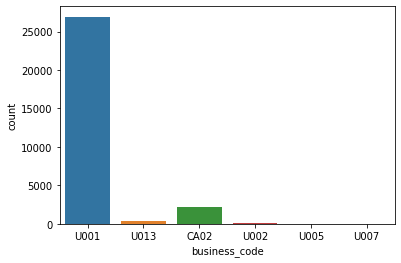

In [56]:
sns.countplot(x = train_data['business_code'])

###### As there are only 6 values we can apply encoding on it later.

### cust_number

customer number given to all the customers of the Account.

In [57]:
train_data.cust_number.value_counts()

0200769623    6364
0200726979    1037
0200762301     866
0200759878     767
0200794332     664
              ... 
0200610381       1
200520353        1
0200932554       1
200966888        1
200529372        1
Name: cust_number, Length: 1232, dtype: int64

In [58]:
len(dict(train_data.cust_number.value_counts()))

1232

There are 1232 unique customers or comapny that we have transactions with.

cust_number represent account no of different companies. For eg WAL-MAR has many varities that is WAL-MAR corporation, WAL-MAR systems etc but they have the same cust_number.

###  name_customer

In [59]:
train_data.name_customer.value_counts()

WAL-MAR llc           676
WAL-MAR associates    664
WAL-MAR co            656
WAL-MAR us            656
WAL-MAR               648
                     ... 
HUDD foundation         1
JAKE foundation         1
BAR corporation         1
DIS trust               1
PAPA JOH systems        1
Name: name_customer, Length: 3446, dtype: int64

Companies Like WAL-MAR, WAL-MAR systems, etc belong to company WAL-MAR and have a unique customer_num to their name hence this column will be dropped.

## clear_date

##### The date on which the customer clears an invoice, or in simple terms, they make the full payment.

In [60]:
train_data.clear_date.min()

Timestamp('2019-01-02 00:00:00')

In [61]:
train_data.clear_date.max()

Timestamp('2019-12-30 00:00:00')

###### Our clear_date ranges for 363 days.

In [62]:
clear_month = train_data.clear_date.dt.month
clear_month.value_counts()

5     3314
4     3061
8     3055
7     3015
9     2983
10    2917
3     2917
6     2767
2     2458
11    1774
1     1291
12     102
Name: clear_date, dtype: int64

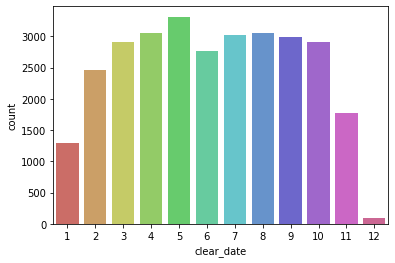

In [63]:
sns.countplot(x=clear_month, palette="hls")

##### May is the month where the companies completed their maximum transations and december is the month companies completed min transactions

### invoice_currency


In [64]:
train_data["invoice_currency"].value_counts()

USD    27419
CAD     2235
Name: invoice_currency, dtype: int64

As there are two currencies involved, we can convert either one them. However, as there is not much difference between USD and CAD, there is not much use of converting them.

### total_open_amount

The amount that is yet to be paid for that invoice

In [65]:
train_data['total_open_amount'].describe().apply(lambda x: format(x,'f'))

count     29654.000000
mean      31643.721044
std       39407.381429
min           0.860000
25%        4522.720000
50%       16932.500000
75%       45675.492500
max      660202.550000
Name: total_open_amount, dtype: object

Automatically binning the amount using pd.qcut.

In [66]:
open_amount_bins = pd.qcut(train_data['total_open_amount'],q=10)
open_amount_bins.value_counts()

(0.859, 813.17]           2974
(80426.921, 660202.55]    2966
(38222.277, 54319.32]     2966
(24509.512, 38222.277]    2966
(6766.134, 12263.522]     2966
(16932.5, 24509.512]      2965
(12263.522, 16932.5]      2965
(2809.254, 6766.134]      2965
(54319.32, 80426.921]     2964
(813.17, 2809.254]        2957
Name: total_open_amount, dtype: int64

In [67]:
amount_bins = [0,5000,10000,50000,100000,1100000]
new_open_amount_bin = pd.cut(train_data['total_open_amount'], bins = amount_bins)

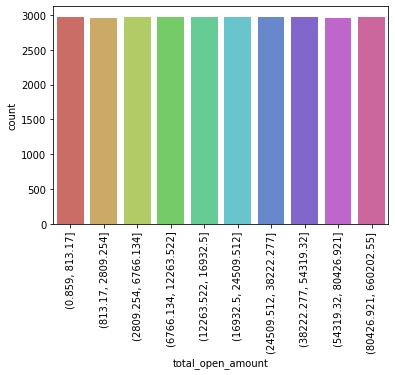

In [68]:
plt.xticks(fontsize=10, rotation=90)
sns.countplot(x=open_amount_bins, palette="hls")

The number of companies in each distribution is same

### Distplot

Text(0.5, 1.0, 'Invoice dates')

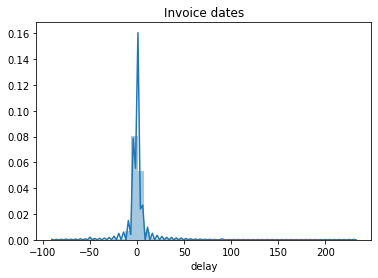

In [69]:
# distribution of the target column 
# It came out to be right skewed distribution
# outliers present but not that significant , hence
#mode is lowest followed by median and mean
sns.distplot(train_data['delay']).set_title('Invoice dates')


since the distribution is right shifted hence it is a positive skewed distribution

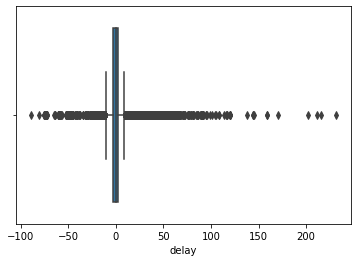

In [70]:
sns.boxplot(train_data['delay'])

#### observing the large number of outliers it might be useful while predicting the reason of delays
#### hence it isnt wise to remove outliers here

In [71]:
#checking the outliers using Zscore methord z=x-mean/SD
# Z score/standard score tells how many standard deviations away a data point is from the mean
from scipy import stats
z=np.abs(stats.zscore(train_data['delay']))

In [72]:
print(z)

[0.53673374 0.53673374 0.53673374 ... 0.26332614 0.27004711 0.35894266]


In [73]:
#adding threshold and checking where the values are greater then threshold
threshold=3
print(np.where(z>3))


(array([   24,    78,    87,   143,   198,   205,   237,   397,   402,
         419,   496,   513,   572,   594,   706,   760,   840,   874,
         879,   880,   894,   929,   936,   971,   990,   999,  1016,
        1060,  1076,  1079,  1091,  1142,  1143,  1165,  1184,  1196,
        1209,  1218,  1238,  1371,  1423,  1510,  1524,  1565,  1622,
        1761,  1771,  1782,  1857,  2015,  2021,  2074,  2141,  2159,
        2162,  2177,  2636,  2739,  2764,  2785,  2808,  2858,  2892,
        2898,  2899,  2902,  2915,  2928,  2951,  2975,  2994,  2999,
        3068,  3085,  3143,  3149,  3203,  3207,  3265,  3270,  3303,
        3383,  3398,  3401,  3428,  3433,  3438,  3475,  3480,  3514,
        3555,  3561,  3563,  3578,  3588,  3608,  3618,  3621,  3689,
        3701,  3717,  3734,  3814,  3856,  3895,  3940,  3954,  3959,
        4042,  4045,  4069,  4105,  4127,  4243,  4350,  4362,  4368,
        4396,  4404,  4433,  4443,  4476,  4479,  4489,  4500,  4522,
        4679,  4722

In [74]:
#to check whether the threshold is greater than 3 at any particular row
print(z[24])

5.330372030075218


In [75]:
train_data['zscore']=(train_data.delay-train_data.delay.mean())/train_data.delay.std()
train_data

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay,zscore
0,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,3794.88,2018-12-30,NAH4,0,-5.0,-0.536725
1,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,1445.64,2018-12-30,NAH4,0,-5.0,-0.536725
2,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,1764.66,2018-12-30,NAH4,0,-5.0,-0.536725
3,U013,0140103335,PARAM associates,2019-01-23,2019.0,2018-12-30,2018-12-30,2019-01-29,USD,13230.19,2018-12-30,NAVE,0,-6.0,-0.625619
4,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,53577.79,2018-12-30,NAH4,0,-4.0,-0.447831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29649,U001,0200726979,BJ'S,2019-11-15,2019.0,2019-10-31,2019-10-31,2019-11-15,USD,64.03,2019-10-31,NAA8,0,0.0,-0.092254
29650,U001,0200974851,RESTA trust,2019-11-27,2019.0,2019-10-31,2019-10-31,2019-11-15,USD,8.06,2019-10-31,NAA8,0,12.0,0.974474
29651,U001,0100031704,DELHAIZE co,2019-11-19,2019.0,2019-10-31,2019-10-31,2019-11-15,USD,12916.80,2019-10-31,NAA8,0,4.0,0.263322
29652,U001,0200794332,COST,2019-11-13,2019.0,2019-10-31,2019-10-31,2019-11-15,USD,19757.46,2019-10-31,NAAX,0,-2.0,-0.270043


In [76]:
train_data['due_month']= train_data['due_in_date'].dt.month

In [77]:
train_data[['due_in_date','due_month']].head()

,due_in_date,due_month
0,2019-01-14,1
1,2019-01-14,1
2,2019-01-14,1
3,2019-01-29,1
4,2019-01-14,1


divided due date into month ,day and year for easy access of dataset and plotting

In [78]:
train_data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
isOpen                             int64
delay                            float64
zscore                           float64
due_month                          int64
dtype: object

## scatterplot

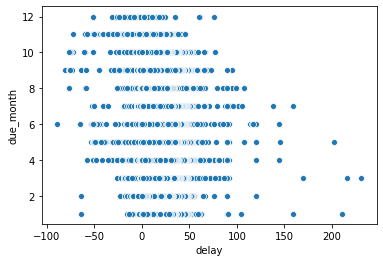

In [79]:
sns.scatterplot(data=train_data,x="delay", y="due_month")

In [80]:
train_data['due_month'].nunique()

12

#### Observing the scatterplot
#### by end of the year most delay are less and
#### by begining of year delays frequency are more

## histogram

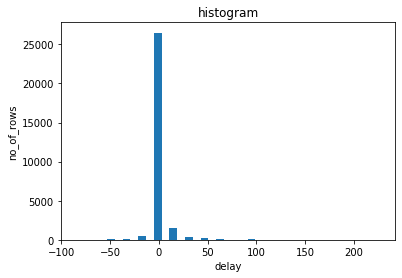

In [81]:


plt.hist(train_data.delay,bins=20, histtype='bar',rwidth=0.5)
plt.xlabel('delay')
plt.ylabel('no_of_rows')
plt.title('histogram')
plt.show()

### isOpen

Tells whether a transaction is open or closed

In [82]:
train_data.isOpen.value_counts()

0    29654
Name: isOpen, dtype: int64

#### Delay analysis

The negative delay specifies that the amount was cleared before the due date and thus there was no delay.Since the bucket list starts from 0 and onwards.Therefore we have capped the negative values to 0.

In [83]:
train_data.delay[train_data.delay<0].count()

10729

In [84]:
train_data['delay']=train_data.delay.apply(lambda x: 0 if x<0 else x)
train_data.delay[train_data.delay<0].count()

0

In [85]:
train_data.delay.describe()

count    29654.000000
mean         2.866494
std          9.558695
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        231.000000
Name: delay, dtype: float64

# MULTIVARIATE ANALYSIS

### Relation b/w business_code with invoice_currency

In [86]:
train_data['invoice_currency'].value_counts()

USD    27419
CAD     2235
Name: invoice_currency, dtype: int64

In [87]:
train_data.groupby("business_code").invoice_currency.value_counts()

business_code  invoice_currency
CA02           CAD                  2235
U001           USD                 26916
U002           USD                   111
U005           USD                    11
U007           USD                     1
U013           USD                   380
Name: invoice_currency, dtype: int64

We see that business code first letter describes in which currency the transaction took place except for 2 entries. Let's explore 

In [88]:
train_data.groupby("invoice_currency").business_code.value_counts()

invoice_currency  business_code
CAD               CA02              2235
USD               U001             26916
                  U013               380
                  U002               111
                  U005                11
                  U007                 1
Name: business_code, dtype: int64

thus CA companies are paying in CAD and US company are paying in USD

###### Lets find the Relation between total_open_amount and delay

In [89]:
delay_bins = [0,15,30,45,60,300]
delay_bucket = pd.cut(train_data['delay'], bins = delay_bins)
pd.crosstab(index = new_open_amount_bin, columns =delay_bucket)

delay,"(0, 15]","(15, 30]","(30, 45]","(45, 60]","(60, 300]"
total_open_amount,,,,,
"(0, 5000]",2574,88,90,63,76
"(5000, 10000]",1160,59,46,31,22
"(10000, 50000]",4852,230,164,102,60
"(50000, 100000]",1937,60,18,9,10
"(100000, 1100000]",910,13,7,8,2


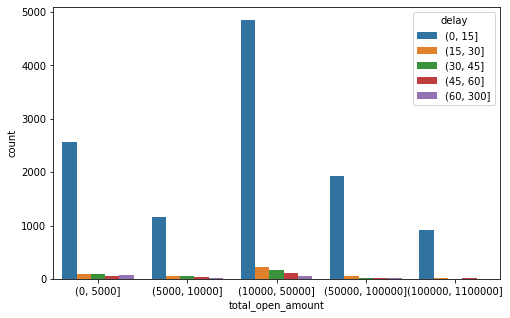

In [90]:
plt.figure(figsize=(8,5))
plt.xlabel("Amount bin")
sns.countplot(x = new_open_amount_bin, hue=delay_bucket)

As we can see from every buckets mostly payment were done within 15 days

In [91]:
train_data.corr()

,buisness_year,total_open_amount,isOpen,delay,zscore,due_month
buisness_year,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,NaN,1.000000,NaN,-0.046975,0.004414,0.007856
isOpen,NaN,NaN,NaN,NaN,NaN,NaN
delay,NaN,-0.046975,NaN,1.000000,0.898462,-0.026859
zscore,NaN,0.004414,NaN,0.898462,1.000000,-0.038266
due_month,NaN,0.007856,NaN,-0.026859,-0.038266,1.000000


since there is no use of zscore after plotting lets drop it

In [92]:
train_data.drop(['zscore'],axis=1 , inplace=True)

# Feature Engineering

In [93]:
train_data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
isOpen                             int64
delay                            float64
due_month                          int64
dtype: object

In [94]:
#added this column at last 
#dropping the colums which are not benifical for modelling

train_data.drop(columns=['business_code', 'document_create_date.1','name_customer','buisness_year','invoice_currency','baseline_create_date', 'cust_payment_terms', 'isOpen'], inplace=True)
train_data

,cust_number,clear_date,posting_date,due_in_date,total_open_amount,delay,due_month
0,0200769623,2019-01-09,2018-12-30,2019-01-14,3794.88,0.0,1
1,0200769623,2019-01-09,2018-12-30,2019-01-14,1445.64,0.0,1
2,0200769623,2019-01-09,2018-12-30,2019-01-14,1764.66,0.0,1
3,0140103335,2019-01-23,2018-12-30,2019-01-29,13230.19,0.0,1
4,0200769623,2019-01-10,2018-12-30,2019-01-14,53577.79,0.0,1
...,...,...,...,...,...,...,...
29649,0200726979,2019-11-15,2019-10-31,2019-11-15,64.03,0.0,11
29650,0200974851,2019-11-27,2019-10-31,2019-11-15,8.06,12.0,11
29651,0100031704,2019-11-19,2019-10-31,2019-11-15,12916.80,4.0,11
29652,0200794332,2019-11-13,2019-10-31,2019-11-15,19757.46,0.0,11


Extracting day and month from posting_date and due_in_date.

In [95]:
train_data["posting_day"] = train_data["posting_date"].dt.day
train_data["posting_month"] = train_data["posting_date"].dt.month

train_data["due_day"] = train_data["due_in_date"].dt.day


In [96]:
train_data

,cust_number,clear_date,posting_date,due_in_date,total_open_amount,delay,due_month,posting_day,posting_month,due_day
0,0200769623,2019-01-09,2018-12-30,2019-01-14,3794.88,0.0,1,30,12,14
1,0200769623,2019-01-09,2018-12-30,2019-01-14,1445.64,0.0,1,30,12,14
2,0200769623,2019-01-09,2018-12-30,2019-01-14,1764.66,0.0,1,30,12,14
3,0140103335,2019-01-23,2018-12-30,2019-01-29,13230.19,0.0,1,30,12,29
4,0200769623,2019-01-10,2018-12-30,2019-01-14,53577.79,0.0,1,30,12,14
...,...,...,...,...,...,...,...,...,...,...
29649,0200726979,2019-11-15,2019-10-31,2019-11-15,64.03,0.0,11,31,10,15
29650,0200974851,2019-11-27,2019-10-31,2019-11-15,8.06,12.0,11,31,10,15
29651,0100031704,2019-11-19,2019-10-31,2019-11-15,12916.80,4.0,11,31,10,15
29652,0200794332,2019-11-13,2019-10-31,2019-11-15,19757.46,0.0,11,31,10,15


In [119]:
train_data[['business_code_enc','business_code']]

,business_code_enc,business_code
33680,1,U001
37963,1,U001
10168,1,U001
41297,1,U001
43062,1,U001
...,...,...
21839,0,CA02
15879,1,U001
32072,1,U001
34612,1,U001


In [120]:
val1['business_code_enc'] = business_code_encoder.transform(val1['business_code'])
val2['business_code_enc'] = business_code_encoder.transform(val2['business_code'])

In [121]:
val2[['business_code_enc','business_code']]

,business_code_enc,business_code
4734,1,U001
7058,1,U001
33011,1,U001
38398,1,U001
44493,1,U001
...,...,...
14435,1,U001
29313,1,U001
26186,1,U001
45990,1,U001


In [98]:
# this function will delete a column from train , validation and test atatime
def john_wick(col ,trainhr = train_data,valhr = val1,testhr = val2):
    trainhr.drop(col, axis =1,inplace=True)
    valhr.drop(col,axis=1 , inplace=True)
    testhr.drop(col,axis=1 , inplace=True)

    return trainhr,valhr ,testhr

In [99]:
# wrote a custom function to do a status check  on all the dataframes 
def status_check(trainhr = train_data,valhr = val1,testhr = val2):
    print(trainhr.info())
    print("****************************")
    print(trainhr.shape,valhr.shape,testhr.shape)
    print("************Train Null Count****************")
    print(trainhr.isna().sum())
    print("************Test Null Count ****************")
    print(testhr.isna().sum())    
    print("************Validation Null Count ****************")
    print(valhr.isna().sum())

In [107]:
#extract day,month and year 

train_data['day_of_clear_date'] = train_data['clear_date'].dt.day
train_data['month_of_clear_date'] = train_data['clear_date'].dt.month

val1['day_of_clear_date'] = val1['clear_date'].dt.day
val1['month_of_clear_date'] = val1['clear_date'].dt.month


val2['day_of_clear_date'] = val2['clear_date'].dt.day
val2['month_of_clear_date'] = val2['clear_date'].dt.month


In [100]:
train_data,val1,val2= john_wick(['clear_date'])

In [101]:
train_data['total_open_amount'].unique()

array([ 3794.88,  1445.64,  1764.66, ..., 12916.8 , 19757.46, 12842.54])

In [102]:
train_data.drop(columns=['posting_date','due_in_date'], inplace=True)
train_data

,cust_number,total_open_amount,delay,due_month,posting_day,posting_month,due_day
0,0200769623,3794.88,0.0,1,30,12,14
1,0200769623,1445.64,0.0,1,30,12,14
2,0200769623,1764.66,0.0,1,30,12,14
3,0140103335,13230.19,0.0,1,30,12,29
4,0200769623,53577.79,0.0,1,30,12,14
...,...,...,...,...,...,...,...
29649,0200726979,64.03,0.0,11,31,10,15
29650,0200974851,8.06,12.0,11,31,10,15
29651,0100031704,12916.80,4.0,11,31,10,15
29652,0200794332,19757.46,0.0,11,31,10,15


In [103]:
train_data['cn'] = train_data['cust_number'].str.extract('(\d+)')

# then will drop that column
train_data.drop('cust_number',axis=1,inplace=True)

#lets see the dataframe
train_data

,total_open_amount,delay,due_month,posting_day,posting_month,due_day,cn
0,3794.88,0.0,1,30,12,14,0200769623
1,1445.64,0.0,1,30,12,14,0200769623
2,1764.66,0.0,1,30,12,14,0200769623
3,13230.19,0.0,1,30,12,29,0140103335
4,53577.79,0.0,1,30,12,14,0200769623
...,...,...,...,...,...,...,...
29649,64.03,0.0,11,31,10,15,0200726979
29650,8.06,12.0,11,31,10,15,0200974851
29651,12916.80,4.0,11,31,10,15,0100031704
29652,19757.46,0.0,11,31,10,15,0200794332


In [104]:
#Converting the data-type of cn as float

train_data['cn']=train_data['cn'].astype(str).astype(float)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29654 entries, 0 to 29653
Data columns (total 7 columns):
total_open_amount    29654 non-null float64
delay                29654 non-null float64
due_month            29654 non-null int64
posting_day          29654 non-null int64
posting_month        29654 non-null int64
due_day              29654 non-null int64
cn                   29654 non-null float64
dtypes: float64(3), int64(4)
memory usage: 3.1 MB


Splitting into x_train and y_train

In [105]:
y_train = train_data['delay']
y_train

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
29649     0.0
29650    12.0
29651     4.0
29652     0.0
29653     0.0
Name: delay, Length: 29654, dtype: float64

In [106]:
x_train = train_data.drop(["delay"], axis=1).copy()
x_train

,total_open_amount,due_month,posting_day,posting_month,due_day,cn
0,3794.88,1,30,12,14,200769623.0
1,1445.64,1,30,12,14,200769623.0
2,1764.66,1,30,12,14,200769623.0
3,13230.19,1,30,12,29,140103335.0
4,53577.79,1,30,12,14,200769623.0
...,...,...,...,...,...,...
29649,64.03,11,31,10,15,200726979.0
29650,8.06,11,31,10,15,200974851.0
29651,12916.80,11,31,10,15,100031704.0
29652,19757.46,11,31,10,15,200794332.0


Now we need to repeat the same process on val1, val2 and x_test.

In [107]:
val1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4537 entries, 29654 to 34190
Data columns (total 13 columns):
business_code             4537 non-null object
cust_number               4537 non-null object
name_customer             4537 non-null object
buisness_year             4537 non-null float64
posting_date              4537 non-null datetime64[ns]
document_create_date.1    4537 non-null datetime64[ns]
due_in_date               4537 non-null datetime64[ns]
invoice_currency          4537 non-null object
total_open_amount         4537 non-null float64
baseline_create_date      4537 non-null datetime64[ns]
cust_payment_terms        4537 non-null object
isOpen                    4537 non-null int64
delay                     4537 non-null float64
dtypes: datetime64[ns](4), float64(3), int64(1), object(5)
memory usage: 496.2+ KB


In [108]:
val1.drop(columns=['document_create_date.1'], inplace=True)
val2.drop(columns=['document_create_date.1'], inplace=True)

In [109]:
val1['delay']=val1.delay.apply(lambda x: 0 if x<0 else x)
val1.drop(['business_code', 'name_customer', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

val1["posting_day"] = val1["posting_date"].dt.day
val1["posting_month"] = val1["posting_date"].dt.month

val1["due_day"] = val1["due_in_date"].dt.day
val1["due_month"] = val1["due_in_date"].dt.month

val1['cn'] = val1['cust_number'].str.extract('(\d+)')
val1.drop('cust_number',axis=1,inplace=True)

val1.drop(columns=['posting_date', 'due_in_date'], inplace=True)
val1

,total_open_amount,delay,posting_day,posting_month,due_day,due_month,cn
29654,122365.49,0.0,1,11,16,11,0200704858
29655,60400.38,2.0,1,11,16,11,0200466603
29656,16724.98,3.0,1,11,16,11,0200762301
29657,53639.91,0.0,1,11,16,11,0200769623
29658,5598.36,2.0,1,11,16,11,0200799367
...,...,...,...,...,...,...,...
34186,5093.02,0.0,31,12,1,2,0200705742
34187,652.61,0.0,31,12,15,1,0200726979
34188,20874.71,0.0,31,12,15,1,0200762301
34189,53625.61,0.0,31,12,15,1,0100001196


In [110]:
val1['cn']=val1['cn'].astype(str).astype(float)
val1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4537 entries, 29654 to 34190
Data columns (total 7 columns):
total_open_amount    4537 non-null float64
delay                4537 non-null float64
posting_day          4537 non-null int64
posting_month        4537 non-null int64
due_day              4537 non-null int64
due_month            4537 non-null int64
cn                   4537 non-null float64
dtypes: float64(3), int64(4)
memory usage: 283.6 KB


Splitting into x_val and y_val

In [111]:
y_val1 = val1['delay']
y_val1

29654    0.0
29655    2.0
29656    3.0
29657    0.0
29658    2.0
        ... 
34186    0.0
34187    0.0
34188    0.0
34189    0.0
34190    2.0
Name: delay, Length: 4537, dtype: float64

In [112]:
x_val1 = val1.drop(["delay"], axis=1).copy()
x_val1

,total_open_amount,posting_day,posting_month,due_day,due_month,cn
29654,122365.49,1,11,16,11,200704858.0
29655,60400.38,1,11,16,11,200466603.0
29656,16724.98,1,11,16,11,200762301.0
29657,53639.91,1,11,16,11,200769623.0
29658,5598.36,1,11,16,11,200799367.0
...,...,...,...,...,...,...
34186,5093.02,31,12,1,2,200705742.0
34187,652.61,31,12,15,1,200726979.0
34188,20874.71,31,12,15,1,200762301.0
34189,53625.61,31,12,15,1,100001196.0


In [113]:
val2['delay']=val2.delay.apply(lambda x: 0 if x<0 else x)
val2.drop(['business_code', 'name_customer', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

val2["posting_day"] = val2["posting_date"].dt.day
val2["posting_month"] = val2["posting_date"].dt.month

val2["due_day"] = val2["due_in_date"].dt.day
val2["due_month"] = val2["due_in_date"].dt.month

val2['cn'] = val2['cust_number'].str.extract('(\d+)')
val2.drop('cust_number',axis=1,inplace=True)

val2.drop(columns=['posting_date', 'due_in_date'], inplace=True)
val2

,total_open_amount,delay,posting_day,posting_month,due_day,due_month,cn
34191,127270.35,0.0,1,1,16,1,0200466603
34192,112425.87,0.0,1,1,16,1,0200799367
34193,355.65,5.0,1,1,16,1,0200769623
34194,9525.79,5.0,1,1,16,1,0200782669
34195,7877.84,5.0,1,1,16,1,0200769623
...,...,...,...,...,...,...,...
39126,26756.71,1.0,26,2,12,3,0200759878
39127,30220.01,0.0,27,2,13,3,0200794332
39128,77434.89,4.0,27,2,8,3,0200721330
39129,39408.22,3.0,27,2,13,3,0200744707


In [114]:
val2['cn']=val2['cn'].astype(str).astype(float)
val2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4940 entries, 34191 to 39130
Data columns (total 7 columns):
total_open_amount    4940 non-null float64
delay                4940 non-null float64
posting_day          4940 non-null int64
posting_month        4940 non-null int64
due_day              4940 non-null int64
due_month            4940 non-null int64
cn                   4940 non-null float64
dtypes: float64(3), int64(4)
memory usage: 308.8 KB


In [115]:
y_val2 = val2['delay']
y_val2

34191    0.0
34192    0.0
34193    5.0
34194    5.0
34195    5.0
        ... 
39126    1.0
39127    0.0
39128    4.0
39129    3.0
39130    0.0
Name: delay, Length: 4940, dtype: float64

In [116]:
x_val2 = val2.drop(["delay"], axis=1).copy()
x_val2

,total_open_amount,posting_day,posting_month,due_day,due_month,cn
34191,127270.35,1,1,16,1,200466603.0
34192,112425.87,1,1,16,1,200799367.0
34193,355.65,1,1,16,1,200769623.0
34194,9525.79,1,1,16,1,200782669.0
34195,7877.84,1,1,16,1,200769623.0
...,...,...,...,...,...,...
39126,26756.71,26,2,12,3,200759878.0
39127,30220.01,27,2,13,3,200794332.0
39128,77434.89,27,2,8,3,200721330.0
39129,39408.22,27,2,13,3,200744707.0


# FEATURE SELECTION

### FILTER METHOD

#### 1. Dropping constant 

In [117]:
from sklearn.feature_selection import VarianceThreshold

#Passing a value of zero for the parameter will filter all the features with zero variance
constant_filter = VarianceThreshold(threshold=0)
#we need to simply apply this filter to our training set as shown in the following example
constant_filter.fit(train_data)
#the number of non-constant features.
len(train_data.columns[constant_filter.get_support()])

7

In [131]:
constant_columns = [column for column in train_data.columns
                    if column not in train_data.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


In [132]:
constant_columns

[]

##### 2.Removing duplicated features

In [133]:
# transpose the feature matrice
train_data_T = x_train.T
# print the number of duplicated features
print(train_data_T.duplicated().sum())
# select the duplicated features columns names
duplicated_columns = train_data_T[train_data_T.duplicated()].index.values

0


In [134]:
duplicated_columns

array([], dtype=object)

#### 3.Correlation Coefficient

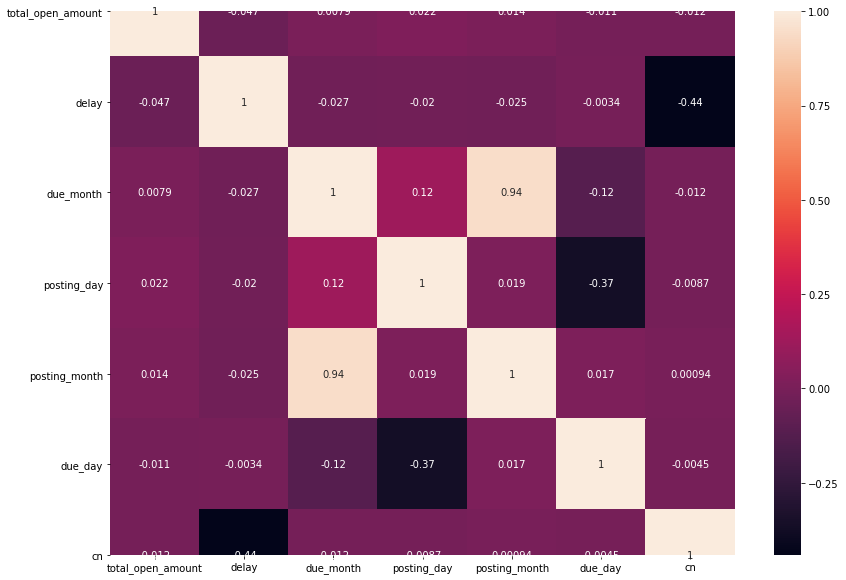

In [118]:
#visualisation
corr=train_data.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr,annot=True)

lets remove month_of_clear_date and day_of_clear_date as those are highly correlated

In [136]:
train_data,val1,val2= john_wick(['month_of_clear_date'])

In [137]:
train_data,val1,val2= john_wick(['day_of_clear_date'])

In [135]:
train_data.dtypes

total_open_amount    float64
delay                float64
due_month              int64
posting_day            int64
posting_month          int64
due_day                int64
cn                   float64
dtype: object

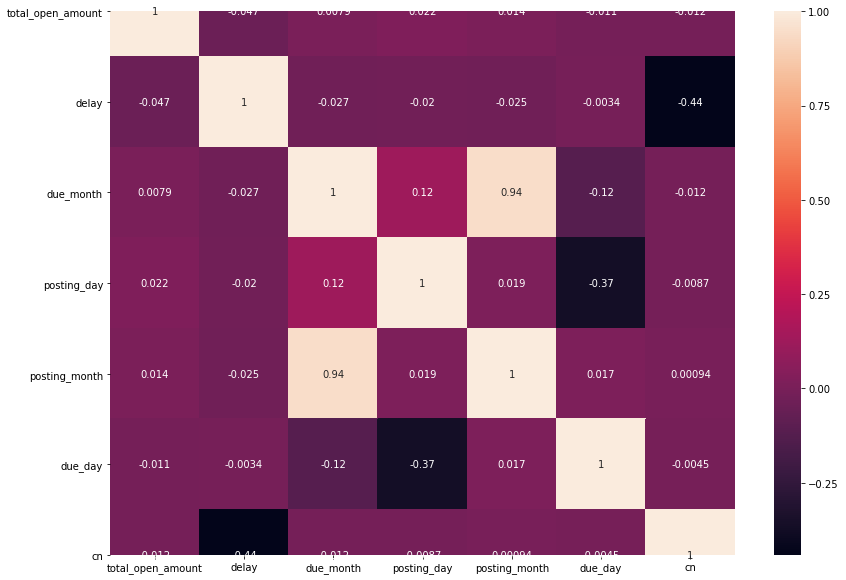

In [119]:
#visualisation
corr=train_data.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr,annot=True)

The logic behind using correlation for feature selection is that the good variables are highly correlated(too highly correlated 
with target variable is not allowed) with the target. 
Furthermore, variables should be correlated with the target but should be uncorrelated among themselves


As we can see from the above graph due_month and doc_create_month are highly correlated and thus they will have a negative impact on our model. So drop remove due_month.

In [120]:
x_train = x_train.drop(["posting_month"], axis=1).copy()
x_val1 = x_val1.drop(["posting_month"], axis=1).copy()
x_val2 = x_val2.drop(["posting_month"], axis=1).copy()

# MODELING

As this is a regression model we will use the following models:-

Linear Regressor,
SVR,
Decision Tree,
Random Forest,
XgBoost

In [121]:
!pip install xgboost

In [122]:
import xgboost as xgb

In [123]:
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### XGBoost

In [124]:
#fitting the model 

clf = xgb.XGBRegressor()
clf.fit(x_train, y_train)

# Predicting the Validation Set Results
predicted = clf.predict(x_val1)

In [125]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted), 2))
print("Accuracy= ", clf.score(x_val1,y_val1))

Mean absolute error = 2.12
Mean squared error = 18.86
Median absolute error = 1.08
Explain variance score = 0.03
R2 score = -0.02
Accuracy=  -0.015334177447469342


### LinearRegression

In [126]:
# Fitting Simple Linear Regression to the Training Set
clf5 = LinearRegression()
clf5.fit(x_train, y_train)

# Predicting the Test Set Results
predicted5 = clf.predict(x_val1)

In [127]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted5), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted5), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted5), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted5), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted5), 2))
print("Accuracy= ", clf5.score(x_val1,y_val1))

Mean absolute error = 2.12
Mean squared error = 18.86
Median absolute error = 1.08
Explain variance score = 0.03
R2 score = -0.02
Accuracy=  0.10751274055726712


### Random Forest

In [128]:
clf2 = RandomForestRegressor()
clf2.fit(x_train, y_train)

# Predicting the Validation Set Results
predicted2 = clf2.predict(x_val1)

In [129]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted2), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted2), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted2), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted2), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted2), 2))
print("Accuracy= ", clf2.score(x_val1,y_val1))

Mean absolute error = 2.82
Mean squared error = 35.04
Median absolute error = 1.1
Explain variance score = -0.72
R2 score = -0.89
Accuracy=  -0.8860988987880636


### DecisionTreeRegressor

In [ ]:
# Fitting Decision Tree Regressor to the Training Set
clf3 = DecisionTreeRegressor()
clf3.fit(x_train, y_train)

# Predicting the Validation Set Results
predicted3 = clf3.predict(x_val1)

In [144]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted3), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted3), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted3), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted3), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted3), 2))
print("Accuracy= ", clf3.score(x_val1,y_val1))

Mean absolute error = 3.06
Mean squared error = 95.46
Median absolute error = 1.0
Explain variance score = -3.99
R2 score = -4.14
Accuracy=  -4.1380390059377525


### We'll continue with LinearRegression as it gives us the best result from all the other models.

# Predection set

In [149]:
# Fitting Simple Linear Regression to the Training Set
clf1 = LinearRegression()
clf1.fit(x_train, y_train)

# Predicting the Test Set Results
predicted1 = clf.predict(x_val2)

In [151]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val2, predicted1), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val2, predicted1), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val2, predicted1), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val2, predicted1), 2)) 
print("R2 score =", round(sm.r2_score(y_val2, predicted1), 2))
print("Accuracy= ", clf1.score(x_val2,y_val2))

Mean absolute error = 2.6
Mean squared error = 65.33
Median absolute error = 0.69
Explain variance score = 0.0
R2 score = -0.05
Accuracy=  0.1797335817646344


In [154]:
x_test.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

x_test["posting_day"] = x_test["posting_date"].dt.day
x_test["posting_month"] = x_test["posting_date"].dt.month

x_test["due_day"] = x_test["due_in_date"].dt.day
x_test["due_month"] = x_test["due_in_date"].dt.month

x_test['cn'] = x_test['cust_number'].str.extract('(\d+)')
x_test.drop('cust_number',axis=1,inplace=True)

x_test.drop(columns=['posting_date', 'due_in_date'], inplace=True)
x_test

,document_create_date.1,total_open_amount,posting_day,posting_month,due_day,due_month,cn
0,2020-02-27,69579.37,27,2,13,3,0200769623
1,2020-02-27,13764.30,27,2,13,3,0200705742
2,2020-02-27,117550.74,27,2,13,3,0200778870
3,2020-02-27,57014.81,27,2,13,3,0200771157
4,2020-02-27,84906.91,27,2,13,3,0200762301
...,...,...,...,...,...,...,...
9708,2020-05-15,19798.67,15,5,30,5,0200457993
9709,2020-05-15,17140.86,15,5,30,5,0200763229
9710,2020-05-16,20550.40,16,5,16,5,0100027744
9711,2020-05-19,1373.60,19,5,29,5,0140105785


In [155]:
x_test['cn']=x_test['cn'].astype(str).astype(float)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9713 entries, 0 to 9712
Data columns (total 7 columns):
document_create_date.1    9713 non-null datetime64[ns]
total_open_amount         9713 non-null float64
posting_day               9713 non-null int64
posting_month             9713 non-null int64
due_day                   9713 non-null int64
due_month                 9713 non-null int64
cn                        9713 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 531.3 KB


In [156]:
x_test = x_test.drop(["posting_month"], axis=1).copy()

In [158]:
x_test.drop(['document_create_date.1'], axis=1, inplace=True)

In [159]:
predicted1 = clf1.predict(x_test)

In [160]:
predicted1=np.around(predicted1)
predicted1.astype(int)

array([-1,  0, -2, ..., 10,  6,  0])

In [161]:
len(predicted1)

9713

### We got the delay on test set.

### Creating a new dataframe


In [162]:
Colm=pd.DataFrame()

In [163]:
Delay=[]
for x in predicted1:
    Delay.append(pd.Timedelta(days=x))
Colm['Delay'] = Delay
Colm

,Delay
0,-1 days
1,0 days
2,-2 days
3,-1 days
4,-1 days
...,...
9708,0 days
9709,0 days
9710,10 days
9711,6 days


Predicting the clear date

In [164]:
Colm['clear_date'] = ts['due_in_date']+Colm['Delay']
Colm

,Delay,clear_date
0,-1 days,2020-03-12
1,0 days,2020-03-13
2,-2 days,2020-03-11
3,-1 days,2020-03-12
4,-1 days,2020-03-12
...,...,...
9708,0 days,2020-05-30
9709,0 days,2020-05-30
9710,10 days,2020-05-26
9711,6 days,2020-06-04


In [165]:
aging_bucket = []
for x in predicted1:
    if x<=0:
        aging_bucket.append("(-infi)-0days")
    elif x<=10:
        aging_bucket.append("0-10 days")
    
    else:
        aging_bucket.append("10-(infi)days")
Colm['Aging Bucket']= aging_bucket
Colm.drop(['Delay'],axis=1,inplace=True)
Colm

,clear_date,Aging Bucket
0,2020-03-12,(-infi)-0days
1,2020-03-13,(-infi)-0days
2,2020-03-11,(-infi)-0days
3,2020-03-12,(-infi)-0days
4,2020-03-12,(-infi)-0days
...,...,...
9708,2020-05-30,(-infi)-0days
9709,2020-05-30,(-infi)-0days
9710,2020-05-26,0-10 days
9711,2020-06-04,0-10 days


### This is the final prediction we got

# THE END...